# 周波数応答　ゲイン・フェーズ　ボード線図　ナイキスト線図


In [38]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 周波数応答プロット

周波数領域が基本的に虚軸上のラプラス領域の一部であることを覚えていれば、周波数応答は数値的に計算するのが非常に簡単です。または数学的にも計算できます。s=jω  
ω　各周波数　Rad/sec

In [39]:
omega = numpy.logspace(-2, 10, 1000)
s = omega*1j

In [40]:
omega[:5]

array([0.01      , 0.01028045, 0.01056876, 0.01086516, 0.01116987])

In [41]:
s[:5]

array([0.+0.01j      , 0.+0.01028045j, 0.+0.01056876j, 0.+0.01086516j,
       0.+0.01116987j])

$$ \frac{Vout}{Vin}= \frac{\frac{1}{sC}}{R+\frac{1}{sC}}=\frac{1}{1+sCR} $$

In [42]:
r=100
c=1e-6
G1 = (1/(s*c))/(r+1/(s*c))

# [Bode線図](https://ja.wikipedia.org/wiki/%E3%83%9C%E3%83%BC%E3%83%89%E7%B7%9A%E5%9B%B3)　x軸：ω　y軸:　絶対値・偏角　

In [43]:
def bode(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(omega, numpy.abs(G))
    plt.xlabel("Frequency(ω)")
    ax_mag.set_ylabel("Magnitude|G|")
    ax_phase.semilogx(omega,  numpy.unwrap(numpy.angle(G)))
    ax_phase.set_ylabel("Phase(Rad)")

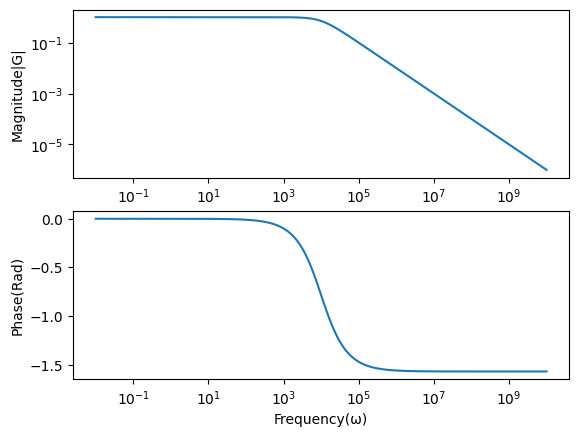

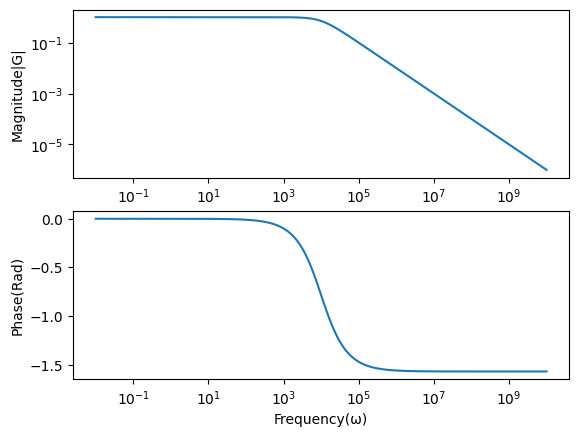

In [44]:
bode(G1)

# Bode線図　x軸：Hz　y軸:　絶対値・偏角

$$ \omega \equiv \frac{d\theta}{dt}=\frac{2\pi}{T}=2\pi f $$
ωは rad/s なので、Frequency (Hz) にすると
$$ frequency= \frac{\omega}{2\pi} $$

In [45]:
import math
freq=omega/(2*math.pi)

In [46]:
def bodeHz(G):
    fig, [ax_mag, ax_phase] = plt.subplots(2, 1)
    ax_mag.loglog(freq, numpy.abs(G))
    plt.xlabel("Frequency(Hz)")
    ax_mag.set_ylabel("Magnitude|G|")
    ax_phase.semilogx(omega,  numpy.unwrap(numpy.angle(G)))
    ax_phase.set_ylabel("Phase(Rad)")

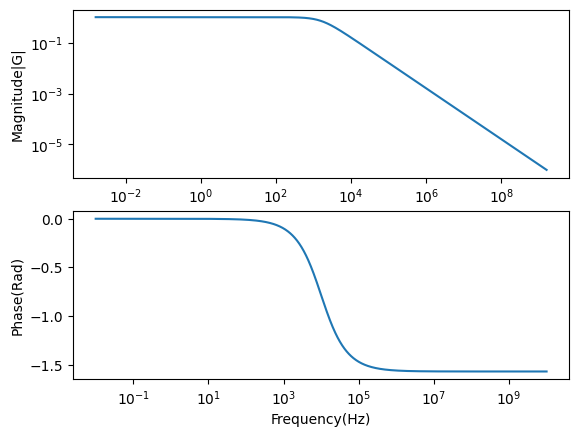

In [47]:
bodeHz(G1)

# Nyquist real imaginary

In [48]:
def nyquist(G):
    plt.plot(G.real, G.imag,
             G.real, -G.imag)
    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.axis('equal')

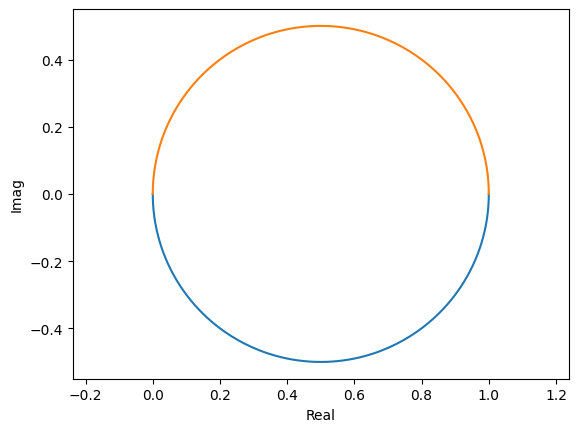

In [49]:
nyquist(G1)

# Library [control](https://python-control.readthedocs.io/en/0.9.4/index.html) を使う
pip install control

In [43]:
import control

In [44]:
G = control.tf(1, [tau**2, 2*tau*zeta, 1])

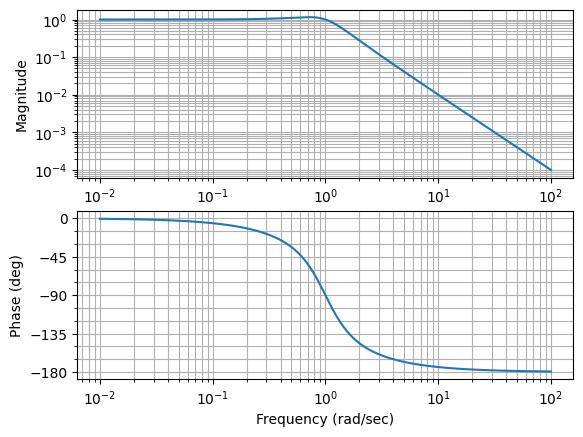

In [45]:
control.bode(G, omega);

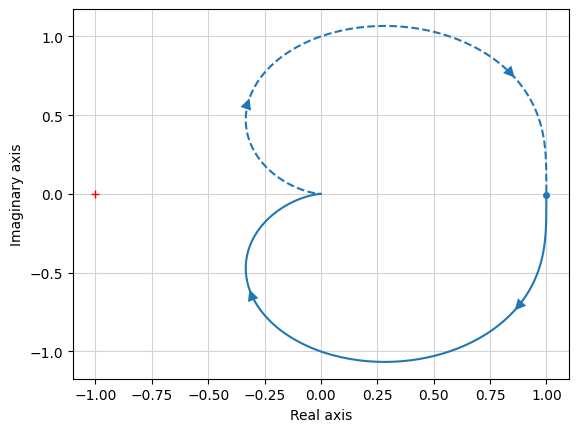

In [46]:
control.nyquist_plot(G, omega);

[(3.3438449982583047, 1.4142293090902067)]

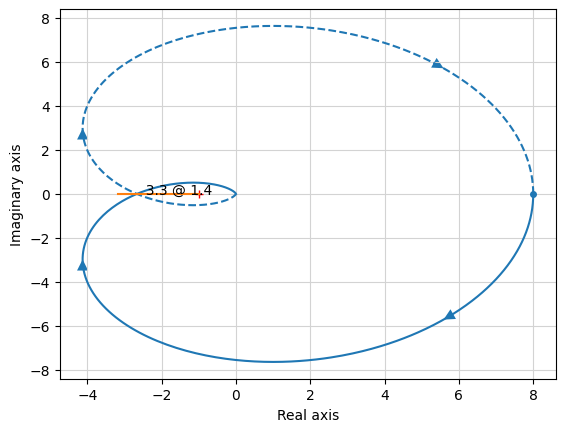

In [52]:
import control as ct
import numpy as np
H_simple = ct.tf([8], [1, 2, 2, 1])
F_saturation = ct.saturation_nonlinearity(1)
amp = np.linspace(1, 4, 10)
ct.describing_function_plot(H_simple, F_saturation, amp)  